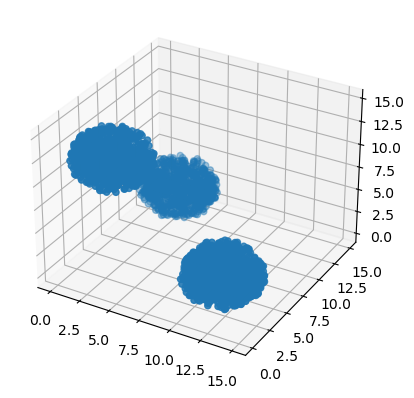

In [230]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

data = []
sphere = [[12,3,3,3], [3,12,3,3], [3,3,12,3]]

def deg_to_rad(d):
    return d*math.pi/180

def get_sphere(x, y, z, r, num):
    data = []
    for i in range(num):
        a = deg_to_rad(random.uniform(0, 360))
        b = deg_to_rad(90-random.uniform(0, 360))
        tmp_r = random.uniform(0,r**3)**(1/3)
        tmp_x = x + tmp_r*math.cos(a)
        tmp_y = y + tmp_r*math.sin(a)*math.cos(b)
        tmp_z = z + tmp_r*math.sin(a)*math.sin(b)
        data.append([tmp_x, tmp_y, tmp_z])
    return data

data = []
for x, y, z, r in sphere:
    data.extend(get_sphere(x, y, z, r, 1000))

data = np.array(data)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data[:,0],data[:,1],data[:,2])
plt.show()

# Learning

In [231]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
index = model.fit_predict(data).reshape(-1, 1)
data = np.append(data, index, axis=1)

# Cluster check

In [232]:
a_data = []
b_data = []
c_data = []
for i in data:
    if i[3] == 0:
        a_data.append(i)
    elif i[3] == 1:
        b_data.append(i)
    else:
        c_data.append(i)
a_data = np.array(a_data)
b_data = np.array(b_data)
c_data = np.array(c_data)

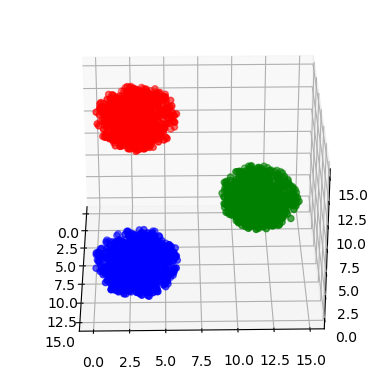

In [233]:
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(a_data[:,0],a_data[:,1],a_data[:,2], color='r')
ax.scatter(b_data[:,0],b_data[:,1],b_data[:,2], color='g')
ax.scatter(c_data[:,0],c_data[:,1],c_data[:,2], color='b')


def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate,
                               frames=360, interval=20, blit=True)
anim.save('mpl3d_scatter.gif', fps=30)
plt.show()